# Import des ressources

In [1236]:
import pandas as pd
import missingno
import plotly.express as px
import numpy as np


# fix pour plotly express et Visual Studio Code
import plotly.io as pio
pio.renderers.default = "notebook_connected"

# Import de la data

In [1237]:
df_customers = pd.read_csv('data/olist_customers_dataset.csv')
df_geolocation = pd.read_csv('data/olist_geolocation_dataset.csv')
df_order_items = pd.read_csv('data/olist_order_items_dataset.csv')
df_order_payments = pd.read_csv('data/olist_order_payments_dataset.csv')
df_order_reviews = pd.read_csv('data/olist_order_reviews_dataset.csv')
df_orders = pd.read_csv('data/olist_orders_dataset.csv')
df_products = pd.read_csv('data/olist_products_dataset.csv')
df_sellers = pd.read_csv('data/olist_sellers_dataset.csv')
df_products_translated = pd.read_csv('data/product_category_name_translation.csv')

# Fonctions

## Fonctions visuelles

In [1238]:
def histogram_univariee(df, colonne, titre):
    fig = px.histogram(df,
                    x=colonne, 
                    color=colonne,
                    title=titre).update_xaxes(categoryorder="total descending")
    fig.update_layout(showlegend=False)
    fig.show()

## Fonctions de calcul

In [1239]:
def soustraire_date(df, colonne_ancienne, colonne_recente, nom_colonne):
    df[colonne_ancienne] = pd.to_datetime(df[colonne_ancienne])
    df[colonne_recente] = pd.to_datetime(df[colonne_recente])

    df_orders_customers[nom_colonne]  = (df[colonne_recente] - df[colonne_ancienne])/ np.timedelta64('1', 'D')
    # df_orders_customers.drop([colonne_ancienne, colonne_recente], axis=1, inplace=True)
    return df

# Pré-analyse
## Jeu de données

<center><img src="https://i.imgur.com/HRhd2Y0.png" width="900" height="500" /></center>

In [1240]:
df_customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [1241]:
df_geolocation


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


In [1242]:
df_order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [1243]:
df_order_payments

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [1244]:
df_order_reviews

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [1245]:
df_orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [1246]:
df_sellers

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


In [1247]:
df_products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [1248]:
df_products_translated

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


In [1249]:
print(len(df_products['product_category_name'].unique()))

74


Avant de voir ce que nous avons, plus dans le détail..., nous pouvons déjà faire des simplifications simples pour réduire le nombre de datasets

### Regroupements des datasets




#### Nom des produits

In [1250]:
# on transforme le df des produits traduits en dict, qui vont nous servir à utiliser replace.
dict_produit_translated = df_products_translated.set_index('product_category_name').to_dict()['product_category_name_english'] # on ajoute product_category_name_english pour ne pas avoir la colonne dans le dict... ce qui va perturber replace

dict_produit_translated


{'beleza_saude': 'health_beauty',
 'informatica_acessorios': 'computers_accessories',
 'automotivo': 'auto',
 'cama_mesa_banho': 'bed_bath_table',
 'moveis_decoracao': 'furniture_decor',
 'esporte_lazer': 'sports_leisure',
 'perfumaria': 'perfumery',
 'utilidades_domesticas': 'housewares',
 'telefonia': 'telephony',
 'relogios_presentes': 'watches_gifts',
 'alimentos_bebidas': 'food_drink',
 'bebes': 'baby',
 'papelaria': 'stationery',
 'tablets_impressao_imagem': 'tablets_printing_image',
 'brinquedos': 'toys',
 'telefonia_fixa': 'fixed_telephony',
 'ferramentas_jardim': 'garden_tools',
 'fashion_bolsas_e_acessorios': 'fashion_bags_accessories',
 'eletroportateis': 'small_appliances',
 'consoles_games': 'consoles_games',
 'audio': 'audio',
 'fashion_calcados': 'fashion_shoes',
 'cool_stuff': 'cool_stuff',
 'malas_acessorios': 'luggage_accessories',
 'climatizacao': 'air_conditioning',
 'construcao_ferramentas_construcao': 'construction_tools_construction',
 'moveis_cozinha_area_de_ser

In [1251]:
# on utilise replace plutôt que map, car il y a 74 produits uniques, alors que notre df product_translated n'en a que 71... map générerait des na sur les produits manquants.
df_products['product_category_name'] = df_products['product_category_name'].replace(dict_produit_translated)

# on vérifie

df_products['product_category_name'].unique()

# df_products_translated ne nous est plus utile normalement...



array(['perfumery', 'art', 'sports_leisure', 'baby', 'housewares',
       'musical_instruments', 'cool_stuff', 'furniture_decor',
       'home_appliances', 'toys', 'bed_bath_table',
       'construction_tools_safety', 'computers_accessories',
       'health_beauty', 'luggage_accessories', 'garden_tools',
       'office_furniture', 'auto', 'electronics', 'fashion_shoes',
       'telephony', 'stationery', 'fashion_bags_accessories', 'computers',
       'home_construction', 'watches_gifts',
       'construction_tools_construction', 'pet_shop', 'small_appliances',
       'agro_industry_and_commerce', nan, 'furniture_living_room',
       'signaling_and_security', 'air_conditioning', 'consoles_games',
       'books_general_interest', 'costruction_tools_tools',
       'fashion_underwear_beach', 'fashion_male_clothing',
       'kitchen_dining_laundry_garden_furniture',
       'industry_commerce_and_business', 'fixed_telephony',
       'construction_tools_lights', 'books_technical',
       'hom

#### Orders
df_customer et df_order ont un point commun : le customer_id. On va donc les regrouper pour réduire le nombre de datasets

In [1253]:
df_orders_customers = df_customers.merge(df_orders, on="customer_id")


In [1254]:
df_orders_customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25 00:00:00
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20 00:00:00
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02 00:00:00
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05 00:00:00


#### Orders items
Même chose...

In [1255]:
df_orders_customers = df_orders_customers.merge(df_order_items, on="order_id")
df_orders_customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25 00:00:00,1,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb49683b,2018-04-12 16:08:45,74.90,13.88
112646,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20 00:00:00,1,9ede6b0570a75a4b9de4f383329f99ee,3fd1e727ba94cfe122d165e176ce7967,2018-04-10 08:35:12,114.90,14.16
112647,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02 00:00:00,1,7a5d2e1e131a860ae7d18f6fffa9d689,d9e7e7778b32987280a6f2cb9a39c57d,2018-04-12 20:30:03,37.00,19.04
112648,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05 00:00:00,1,f819f0c84a64f02d3a5606ca95edd272,4869f7a5dfa277a7dca6462dcf3b52b2,2017-11-09 21:15:51,689.00,22.07


#### Order reviews
df_orders_customers a un point commun avec order_review, qui est l'order_id. Si la personne n'a pas fait de commentaire, alors il est écrit "NaN"

In [1256]:
df_orders_customers = df_orders_customers.merge(df_order_reviews, on="order_id")
pd.set_option('display.max_columns', None)
df_orders_customers
# Cette étape supprime les lignes non-correspondantes.. Ce n'est pas forcément plus mal, on ne peut pas juger la satisfaction sans commentaire ou autre indication.


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,88b8b52d46df026a9d1ad2136a59b30b,4,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5,NaN,NaN,2018-01-30 00:00:00,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,5ad6695d76ee186dc473c42706984d87,5,NaN,NaN,2018-06-15 00:00:00,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,059a801bb31f6aab2266e672cab87bc5,5,NaN,NaN,2018-03-29 00:00:00,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,8490879d58d6c5d7773f2739a03f089a,5,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10 00:00:00,2018-08-17 01:59:52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112367,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25 00:00:00,1,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb49683b,2018-04-12 16:08:45,74.90,13.88,36e2cdbaa9f639b57c53b37ac798fee8,4,Recomendo,NaN,2018-04-14 00:00:00,2018-04-28 11:15:04
112368,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20 00:00:00,1,9ede6b0570a75a4b9de4f383329f99ee,3fd1e727ba94cfe122d165e176ce7967,2018-04-10 08:35:12,114.90,14.16,b273b431c3aedb4eed18643309652940,5,NaN,NaN,2018-04-12 00:00:00,2018-04-16 10:36:05
112369,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02 00:00:00,1,7a5d2e1e131a860ae7d18f6fffa9d689,d9e7e7778b32987280a6f2cb9a39c57d,2018-04-12 20:30:03,37.00,19.04,fa4f16891e6b2edd1354668d07f5648b,1,Chateada,Esperava qualidade no atendimento e estou tend...,2018-05-04 00:00:00,2018-05-08 01:41:07
112370,56b18e2166679b8a9

#### Order payment

In [1257]:
df_orders_customers = df_orders_customers.merge(df_order_payments, on="order_id")
df_orders_customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,88b8b52d46df026a9d1ad2136a59b30b,4,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40,1,credit_card,2,146.87
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5,NaN,NaN,2018-01-30 00:00:00,2018-02-10 22:43:29,1,credit_card,8,335.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,5ad6695d76ee186dc473c42706984d87,5,NaN,NaN,2018-06-15 00:00:00,2018-06-15 12:10:59,1,credit_card,7,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,059a801bb31f6aab2266e672cab87bc5,5,NaN,NaN,2018-03-29 00:00:00,2018-04-02 18:36:47,1,credit_card,1,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,8490879d58d6c5d7773f2739a03f089a,5,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10 00:00:00,2018-08-17 01:59:52,1,credit_card,8,252.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117324,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25 00:00:00,1,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb49683b,2018-04-12 16:08:45,74.90,13.88,36e2cdbaa9f639b57c53b37ac798fee8,4,Recomendo,NaN,2018-04-14 00:00:00,2018-04-28 11:15:04,1,credit_card,6,88.78
117325,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20 00:00:00,1,9ede6b0570a75a4b9de4f383329f99ee,3fd1e727ba94cfe122d165e176ce7967,2018-04-10 08:35:12,114.90,14.16,b273b431c3aedb4eed18643309652940,5,NaN,NaN,2018-04-12 00:00:00,2018-04-16 10:36:05,1,credit_card,3,129.06
117326,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02 00:00:00,1,7a5d2e1e131a8

#### Products

In [1258]:
df_orders_customers = df_orders_customers.merge(df_products, on="product_id")
df_orders_customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,88b8b52d46df026a9d1ad2136a59b30b,4,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40,1,credit_card,2,146.87,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,112.99,24.90,7fc63200f12eebb5f387856afdd63db8,1,NaN,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...",2017-11-29 00:00:00,2017-12-01 19:41:59,1,credit_card,1,275.79,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19 00:00:00,2,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,112.99,24.90,7fc63200f12eebb5f387856afdd63db8,1,NaN,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...",2017-11-29 00:00:00,2017-12-01 19:41:59,1,credit_card,1,275.79,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,2017-05-26 09:54:04,2017-06-12 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 22:22:56,124.99,15.62,251191809e37c1cffc16865947c18a4d,3,NaN,"Produto compatível com seu valor, muito bonito...",2017-05-27 00:00:00,2017-05-28 02:43:16,1,credit_card,7,140.61,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,2018-02-28 21:09:00,2018-03-22 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2018-02-18 21:29:19,106.99,30.59,f7123bac5b91a0e2e38d8b41fd1206f4,4,NaN,Entregou antes do prazo,2018-03-01 00:00:00,2018-03-02 11:11:24,1,credit_card,10,137.58,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117324,da37711b17efd5f2539e8196ab215f04,5f2971f9805e3ccb030226e30c8e8390,4313,sao paulo,SP,c8203bb57639618630affac9e8e923dd,delivered,2017-03-27 23:04:18,2017-03-27 23:23:38,2017-03-28 14:18:59,2017-03-30 17:06:19,2017-04-13 00:00:00,1,aea06073397f809424f946979354c9f0,f45122a9ab94eb4f3f8953578bc0c560,2017-04-02 23:23:38,19.99,10.96,f3642bae4843d919c4c53ec1ff8fe26d,4,NaN,NaN,2017-03-31 00:00:00,2017-04-04 01:37:20,1,credit_card,1,30.95,pet_shop,43.0,779.0,1.0,300.0,16.0,16.0,16.0
117325,184e0c2cfc746789643521df0e9ff904,c64ede6d0ae8901b1b6fb03528c1b7e6,68660,sao miguel do gu

#### Sellers

In [1259]:
df_orders_customers = df_orders_customers.merge(df_sellers, on="seller_id")
df_orders_customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,88b8b52d46df026a9d1ad2136a59b30b,4,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40,1,credit_card,2,146.87,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,112.99,24.90,7fc63200f12eebb5f387856afdd63db8,1,NaN,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...",2017-11-29 00:00:00,2017-12-01 19:41:59,1,credit_card,1,275.79,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19 00:00:00,2,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,112.99,24.90,7fc63200f12eebb5f387856afdd63db8,1,NaN,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...",2017-11-29 00:00:00,2017-12-01 19:41:59,1,credit_card,1,275.79,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,2017-05-26 09:54:04,2017-06-12 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 22:22:56,124.99,15.62,251191809e37c1cffc16865947c18a4d,3,NaN,"Produto compatível com seu valor, muito bonito...",2017-05-27 00:00:00,2017-05-28 02:43:16,1,credit_card,7,140.61,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,2018-02-28 21:09:00,2018-03-22 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2018-02-18 21:29:19,106.99,30.59,f7123bac5b91a0e2e38d8b41fd1206f4,4,NaN,Entregou antes do prazo,2018-03-01 00:00:00,2018-03-02 11:11:24,1,credit_card,10,137.58,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117324,eda10d7eb51a675d000956fa1aabc7dd,5c22dbb9d8b5385953f2f1e6d9d115a7,39920,jordania,MG,b494f624c631105b24fe497277085909,delivered,2018-08-01 18:58:49,2018-08-02 18:50:15,2018-08-03 15:39:00,2018-08-13 23:16:46,2018-08-27 00:00:00,1,a2fce4213a6ac271129618259a334261,9140ef75cc8211c4035935e80e567204,2018-08-08 18:50:15,49.90,22.28,709ee020ff826ee5289d7dd5d6911d0c,5,NaN,NaN,2018-08-14 00:00:00,20

## Caractéristiques du jeu de données
### Variables

In [1260]:
df_orders_customers.dtypes

customer_id                       object
customer_unique_id                object
customer_zip_code_prefix           int64
customer_city                     object
customer_state                    object
order_id                          object
order_status                      object
order_purchase_timestamp          object
order_approved_at                 object
order_delivered_carrier_date      object
order_delivered_customer_date     object
order_estimated_delivery_date     object
order_item_id                      int64
product_id                        object
seller_id                         object
shipping_limit_date               object
price                            float64
freight_value                    float64
review_id                         object
review_score                       int64
review_comment_title              object
review_comment_message            object
review_creation_date              object
review_answer_timestamp           object
payment_sequenti

In [1261]:
df_orders_customers.describe()

,customer_zip_code_prefix,order_item_id,price,freight_value,review_score,payment_sequential,payment_installments,payment_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix
count,117329.000000,117329.000000,117329.000000,117329.000000,117329.000000,117329.000000,117329.000000,117329.000000,115634.000000,115634.000000,115634.000000,117309.000000,117309.000000,117309.000000,117309.000000,117329.000000
mean,35060.118112,1.194121,120.524349,20.027514,4.031467,1.094452,2.940151,172.062565,48.768018,785.802861,2.205528,2110.763062,30.254456,16.612476,23.071452,24450.781955
std,29849.496175,0.684225,182.944843,15.828077,1.387927,0.731174,2.775370,265.388194,10.033831,652.382965,1.717783,3785.128931,16.177519,13.452625,11.745875,27582.364358
min,1003.000000,1.000000,0.850000,0.000000,1.000000,1.000000,0.000000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1001.000000
25%,11250.000000,1.000000,39.900000,13.080000,4.000000,1.000000,1.000000,60.750000,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,6429.000000
50%,24240.000000,1.000000,74.900000,16.280000,5.000000,1.000000,2.000000,108.100000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,13660.000000
75%,58770.000000,1.000000,134.900000,21.180000,5.000000,1.000000,4.000000,189.060000,57.000000,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,28035.000000
max,99990.000000,21.000000,6735.000000,409.680000,5.000000,29.000000,24.000000,13664.080000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,99730.000000


#### Remplissage

<AxesSubplot:>

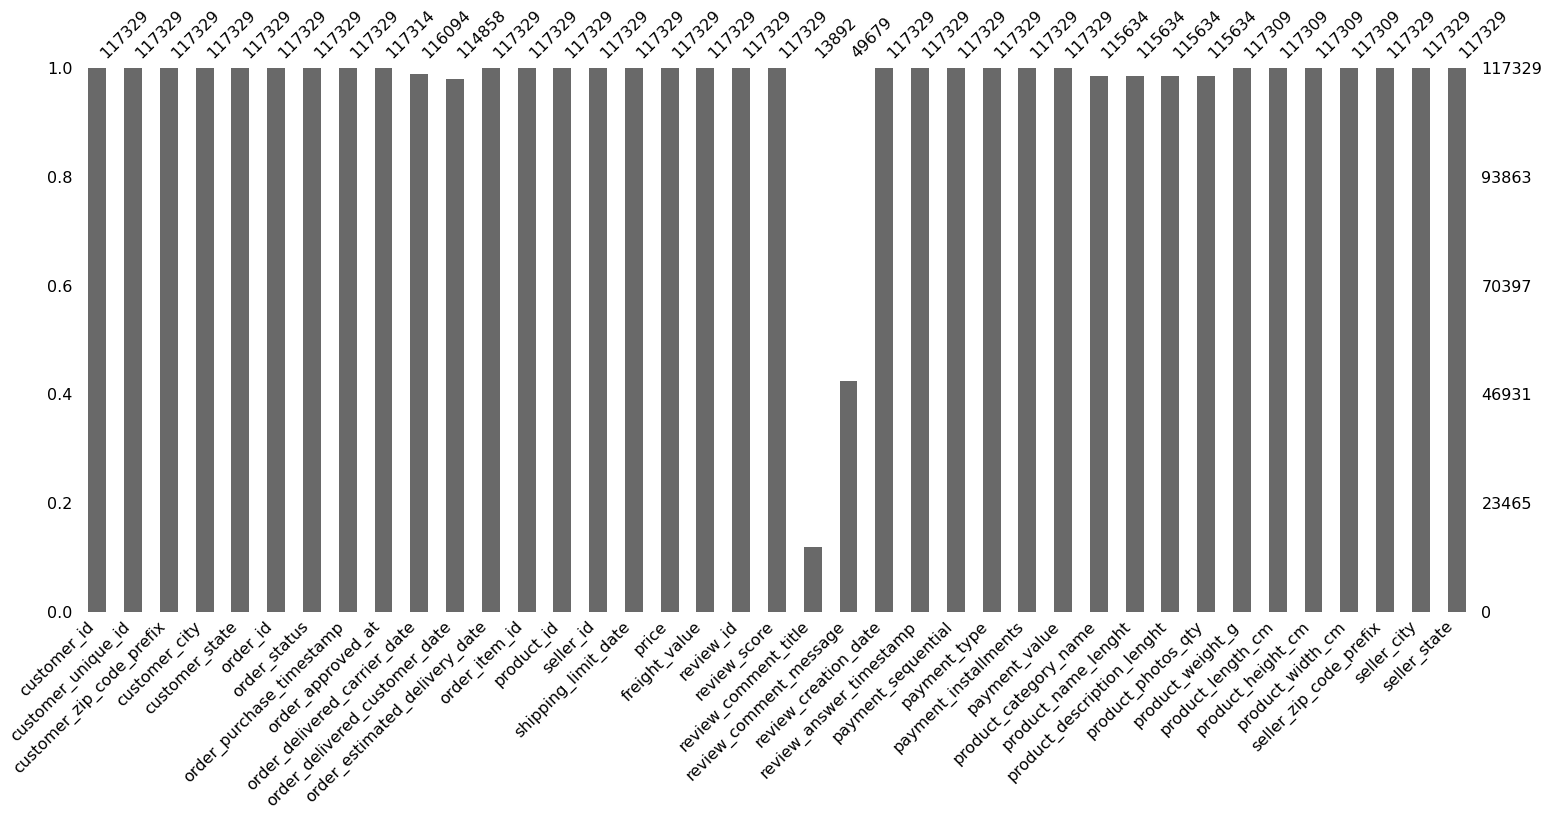

In [1262]:
missingno.bar(df_orders_customers)


<span style="color: #00B0F0">Il y a 2 variables auquel il manque beaucoup de données. Pour le reste, c'est plutôt satisfaisant... On s'en occupera plus tard.</span>

In [1263]:
df_orders_customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,88b8b52d46df026a9d1ad2136a59b30b,4,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40,1,credit_card,2,146.87,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,112.99,24.90,7fc63200f12eebb5f387856afdd63db8,1,NaN,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...",2017-11-29 00:00:00,2017-12-01 19:41:59,1,credit_card,1,275.79,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19 00:00:00,2,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,112.99,24.90,7fc63200f12eebb5f387856afdd63db8,1,NaN,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...",2017-11-29 00:00:00,2017-12-01 19:41:59,1,credit_card,1,275.79,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,2017-05-26 09:54:04,2017-06-12 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 22:22:56,124.99,15.62,251191809e37c1cffc16865947c18a4d,3,NaN,"Produto compatível com seu valor, muito bonito...",2017-05-27 00:00:00,2017-05-28 02:43:16,1,credit_card,7,140.61,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,2018-02-28 21:09:00,2018-03-22 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2018-02-18 21:29:19,106.99,30.59,f7123bac5b91a0e2e38d8b41fd1206f4,4,NaN,Entregou antes do prazo,2018-03-01 00:00:00,2018-03-02 11:11:24,1,credit_card,10,137.58,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117324,eda10d7eb51a675d000956fa1aabc7dd,5c22dbb9d8b5385953f2f1e6d9d115a7,39920,jordania,MG,b494f624c631105b24fe497277085909,delivered,2018-08-01 18:58:49,2018-08-02 18:50:15,2018-08-03 15:39:00,2018-08-13 23:16:46,2018-08-27 00:00:00,1,a2fce4213a6ac271129618259a334261,9140ef75cc8211c4035935e80e567204,2018-08-08 18:50:15,49.90,22.28,709ee020ff826ee5289d7dd5d6911d0c,5,NaN,NaN,2018-08-14 00:00:00,20

#### Doublons


In [1264]:
df_orders_customers.duplicated(keep="first").value_counts()


False    117329
dtype: int64

<span style="color: #26B260">Pas de lignes complètement doublons</span>

In [1265]:
print("order_id : \n" + str(df_orders_customers['order_id'].duplicated(keep="first").value_counts()) + 
      "\n \nClients id : \n" + str(df_orders_customers['customer_unique_id'].duplicated(keep="first").value_counts()))


order_id : 
False    97916
True     19413
Name: order_id, dtype: int64
 
Clients id : 
False    94720
True     22609
Name: customer_unique_id, dtype: int64


19000 order_id sont plusieurs fois présentes.
22609 clients id sont plusieurs fois présents

<span style="color: #FF7F00">97916 commandes ont un seul article / 94720 clients n'ont fait qu'une commande ?</span>

## Observations générales des données 
### Géolocalisation
Il y a beaucoup de données et pas mal de doublons... On le voit notamment avec le zipcode 1046 et 99950.
Etant donné que ce sont des latitudes/longitudes proches... on ne va garder que la première occurence.

In [1266]:
df_geolocation.drop_duplicates(['geolocation_zip_code_prefix'], keep='first', inplace=True)
df_geolocation

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
5,1012,-23.547762,-46.635361,são paulo,SP
...,...,...,...,...,...
999774,99955,-28.107588,-52.144019,vila langaro,RS
999780,99970,-28.345143,-51.876926,ciriaco,RS
999786,99910,-27.863500,-52.084760,floriano peixoto,RS
999803,99920,-27.858716,-52.300403,erebango,RS


In [1267]:
import folium
map = folium.Map(location=[df_geolocation['geolocation_lat'].mean(), df_geolocation['geolocation_lng'].mean()],
                 zoom_start=5,
                 control_scale=True)

In [1268]:
for index, localisation in df_geolocation.iterrows():
    folium.Circle([localisation['geolocation_lat'],
                   localisation['geolocation_lng']],
                   popup=localisation['geolocation_city'], radius=50).add_to(map)

In [1302]:
#map # si on l'active, le fichier prend 30+ mo

### Clients

In [1270]:
clients_unique = df_orders_customers['customer_unique_id'].nunique()
print(f'Il y a {clients_unique} clients uniques')

Il y a 94720 clients uniques


In [1271]:
histogram_univariee(df_orders_customers[~df_orders_customers.duplicated(subset='customer_unique_id', keep="first")], 'customer_state', 'Répartition par Etat des clients')

### Vendeurs


In [1272]:
vendeurs_unique = df_orders_customers['seller_id'].nunique()
print(f'Il y a {vendeurs_unique} vendeurs uniques')

Il y a 3090 vendeurs uniques


In [1273]:
histogram_univariee(df_orders_customers[~df_orders_customers.duplicated(subset='seller_id', keep="first")], 'seller_state', 'Répartition par Etat des vendeurs')

La majorité des clients/vendeurs sont dans l'Etat de Sao Paulo

### Produits
#### Nombres de commandes en fonction de l'Etat

In [1274]:
# Nombre de commandes :
print(f' Nombres de produits achetés : {df_orders_customers.shape[0]}')

 Nombres de produits achetés : 117329


In [1275]:
# Pays où il y a des commandes
pays_unique = df_orders_customers['customer_state'].nunique()
ville_unique = df_orders_customers['customer_city'].nunique()
print(f'Il y a {pays_unique} Etats où il y a des commandes, répartis dans {ville_unique} villes.')

Il y a 27 Etats où il y a des commandes, répartis dans 4108 villes.


In [1276]:
histogram_univariee(df_orders_customers, "customer_state", "Ventes par Etat")

#### Prix

In [1277]:
# Distribution
fig = px.histogram(df_orders_customers, x="price")
fig.show()

#### Paiements
##### Type de paiements

In [1278]:
fig = px.pie(values=df_orders_customers['payment_type'].value_counts(), names=df_orders_customers['payment_type'].value_counts().index)
fig.show()

##### Paiements échelonnés

In [1279]:
histogram_univariee(df_orders_customers, "payment_installments", "Nombre de paiements")

#### Notes des produits

In [1280]:
histogram_univariee(df_orders_customers, "review_score", "Score produit")

In [1281]:
moyenne_categorie = df_orders_customers.groupby('product_category_name').agg({'review_score' : ['count', 'mean']})

# pour éviter de biaiser l'observation, on ne va prendre que les catégories représentés 50 fois minimums

moyenne_categorie = moyenne_categorie[moyenne_categorie['review_score']['count'] > 50]

fig = px.histogram(moyenne_categorie,
                    y=moyenne_categorie.index,
                    x = moyenne_categorie['review_score']['mean'].values,
                    color=moyenne_categorie.index,
                    title="Moyenne par catégorie").update_yaxes(categoryorder="total ascending")
fig.update_layout(showlegend=False)
fig.show()

### Commandes
#### Statut de la commande

In [1282]:
fig = px.pie(values=df_orders_customers['order_status'].value_counts(), names=df_orders_customers['order_status'].value_counts().index)
fig.show()

In [1283]:
df_orders_customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,88b8b52d46df026a9d1ad2136a59b30b,4,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40,1,credit_card,2,146.87,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,112.99,24.90,7fc63200f12eebb5f387856afdd63db8,1,NaN,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...",2017-11-29 00:00:00,2017-12-01 19:41:59,1,credit_card,1,275.79,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19 00:00:00,2,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,112.99,24.90,7fc63200f12eebb5f387856afdd63db8,1,NaN,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...",2017-11-29 00:00:00,2017-12-01 19:41:59,1,credit_card,1,275.79,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,2017-05-26 09:54:04,2017-06-12 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 22:22:56,124.99,15.62,251191809e37c1cffc16865947c18a4d,3,NaN,"Produto compatível com seu valor, muito bonito...",2017-05-27 00:00:00,2017-05-28 02:43:16,1,credit_card,7,140.61,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,2018-02-28 21:09:00,2018-03-22 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2018-02-18 21:29:19,106.99,30.59,f7123bac5b91a0e2e38d8b41fd1206f4,4,NaN,Entregou antes do prazo,2018-03-01 00:00:00,2018-03-02 11:11:24,1,credit_card,10,137.58,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117324,eda10d7eb51a675d000956fa1aabc7dd,5c22dbb9d8b5385953f2f1e6d9d115a7,39920,jordania,MG,b494f624c631105b24fe497277085909,delivered,2018-08-01 18:58:49,2018-08-02 18:50:15,2018-08-03 15:39:00,2018-08-13 23:16:46,2018-08-27 00:00:00,1,a2fce4213a6ac271129618259a334261,9140ef75cc8211c4035935e80e567204,2018-08-08 18:50:15,49.90,22.28,709ee020ff826ee5289d7dd5d6911d0c,5,NaN,NaN,2018-08-14 00:00:00,20

# Suppression des variables inutiles
Ici, la majorité des variables catégoriques ne vont pas nous servir.
Pour celles qui vont nous être utiles, il faudra trouver un moyen de les rendre numérique.

On va donc prendre cela en compte, et également supprimer les colonnes qui ne nous aideront pas à segmenter les clients.

In [1284]:
# Colonnes textes qu'on ne peut pas vraiment traiter... En plus de cela, il y a trop peu de données via le missingno précédent.
df_orders_customers.drop(['review_comment_title', 'review_comment_message'], axis=1, inplace=True)

# On veut ségmenter par client. Les informations du vendeur ont donc peu d'importance.
df_orders_customers.drop(['seller_id', 'seller_city', 'seller_state', 'seller_zip_code_prefix'], axis=1, inplace=True)


# Suppression des produits inutiles.
Les produits dont la commande est toujours en cours, ne nous intéressent pas. Ce qu'on veut, c'est la finalité.

<span style="color: #F00000">A voir si on ne prend que les "delivered"</span>

In [1285]:
df_orders_customers[df_orders_customers['order_status'] == "delivered"]
df_orders_customers.drop(['order_status'], axis=1, inplace=True) # on n'a que des delivered. La colonne est donc désormais inutile

# Feature engineering


## Volume du produit

on peut remplacer la longueur/hauteur/largeur par le volume du produit



In [1286]:
df_orders_customers['product_volume_cm^3'] = df_orders_customers['product_length_cm'] * df_orders_customers['product_height_cm'] * df_orders_customers['product_width_cm']

df_orders_customers.drop(['product_length_cm', 'product_height_cm', 'product_width_cm'], axis=1, inplace=True)

df_orders_customers


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,shipping_limit_date,price,freight_value,review_id,review_score,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_volume_cm^3
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,2017-05-22 15:22:12,124.99,21.88,88b8b52d46df026a9d1ad2136a59b30b,4,2017-05-26 00:00:00,2017-05-30 22:34:40,1,credit_card,2,146.87,office_furniture,41.0,1141.0,1.0,8683.0,107136.0
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,2017-11-23 00:47:18,112.99,24.90,7fc63200f12eebb5f387856afdd63db8,1,2017-11-29 00:00:00,2017-12-01 19:41:59,1,credit_card,1,275.79,office_furniture,41.0,1141.0,1.0,8683.0,107136.0
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19 00:00:00,2,a9516a079e37a9c9c36b9b78b10169e8,2017-11-23 00:47:18,112.99,24.90,7fc63200f12eebb5f387856afdd63db8,1,2017-11-29 00:00:00,2017-12-01 19:41:59,1,credit_card,1,275.79,office_furniture,41.0,1141.0,1.0,8683.0,107136.0
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,2017-05-26 09:54:04,2017-06-12 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,2017-05-22 22:22:56,124.99,15.62,251191809e37c1cffc16865947c18a4d,3,2017-05-27 00:00:00,2017-05-28 02:43:16,1,credit_card,7,140.61,office_furniture,41.0,1141.0,1.0,8683.0,107136.0
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,2018-02-28 21:09:00,2018-03-22 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,2018-02-18 21:29:19,106.99,30.59,f7123bac5b91a0e2e38d8b41fd1206f4,4,2018-03-01 00:00:00,2018-03-02 11:11:24,1,credit_card,10,137.58,office_furniture,41.0,1141.0,1.0,8683.0,107136.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117324,eda10d7eb51a675d000956fa1aabc7dd,5c22dbb9d8b5385953f2f1e6d9d115a7,39920,jordania,MG,b494f624c631105b24fe497277085909,2018-08-01 18:58:49,2018-08-02 18:50:15,2018-08-03 15:39:00,2018-08-13 23:16:46,2018-08-27 00:00:00,1,a2fce4213a6ac271129618259a334261,2018-08-08 18:50:15,49.90,22.28,709ee020ff826ee5289d7dd5d6911d0c,5,2018-08-14 00:00:00,2018-08-15 11:31:29,1,credit_card,3,72.18,pet_shop,51.0,433.0,1.0,200.0,8960.0
117325,f0f671d4034e98cdf20f0c452d6db02b,6532316a8c1a7c7a569482db073530bb,7231,guarulhos,SP,f73b31435ce6dec43df056154c39a1ce,2018-08-20 12:37:54,2018-08-20 15:35:42,2018-08-24 16:48:00,NaN,2018-08-27 00:00:00,1,5ece1e51ece4648de249ec6e9d007fd6,2018-08-24 15:34:56,730.00,45.98,274e38de8990f74fc03894fa488b5cd5,3,2018-08-29 00:00:00,2018-08-30 12:07:35,1,credit_card,10,775.98,home_construction,42.0,2129.0,1.0,15008.0,74307.0
117326,b90b857a277b080d8078332b3636ab58,7f5f43a9394964ac51bc5d1e0204ead4,76400,uruacu,GO,d76fe905f4588ad69ab3b36527bb267d,2018-08-18 20:59:58,2018-08-18 21:10:13,2018-08-20 16:49:00,2018-08-28 18:16:44,2018-09-10 00:00:00,1,d6e7ac236e583af1e1543d8068c91676,2018-08-21 21:10:13,135.98,88.46,6010e1ba95a9

## délai de livraison

On peut trouver la date de livraison, en soustrayant la date de livraison - la date d'achat

In [1287]:
df_orders_customers = soustraire_date(df_orders_customers, 'order_purchase_timestamp', 'order_delivered_customer_date', 'Délai de livraison')
df_orders_customers.drop(['order_delivered_customer_date'], axis=1, inplace=True)

## Délai pour une review

Idem. On soustraie la date de la review - la date de la possibilité d'écrire une review

In [1288]:
df_orders_customers = soustraire_date(df_orders_customers, 'review_creation_date', 'review_answer_timestamp', 'Délai review')
df_orders_customers.drop(['review_creation_date', 'review_answer_timestamp'], axis=1, inplace=True)

## Dernière commande


In [1289]:
df_lastcmd = df_orders_customers.groupby(by=['customer_unique_id']).agg({'order_purchase_timestamp' : 'max'})
df_lastcmd.reset_index(inplace=True)
# Les commandes sont sur 2016-2018... pour calculer la dernière cmd, on peut partir du 1er Janvier 2019.

df_lastcmd['Dernière commande (Jours)'] = pd.to_datetime("01/01/2019") - df_lastcmd['order_purchase_timestamp']

# on convertit en jours

df_lastcmd['Dernière commande (Jours)'] = df_lastcmd['Dernière commande (Jours)'].dt.days

In [1290]:
df_lastcmd

,customer_unique_id,order_purchase_timestamp,Dernière commande (Jours)
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,235
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,238
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,661
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,445
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,412
...,...,...,...
94715,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36,571
94716,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56,386
94717,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16,692
94718,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41,243


In [1291]:
fig = px.box(df_lastcmd, y="Dernière commande (Jours)", title="Distribution des dernières commandes")
fig.show()

## Nombre de commandes par client

In [1292]:
df_nb_commande = pd.DataFrame(df_orders_customers['customer_unique_id'].value_counts())
df_nb_commande.rename(columns={'customer_unique_id' : 'Nombre_commandes'}, inplace=True)

df_nb_commande

,Nombre_commandes
9a736b248f67d166d2fbb006bcb877c3,75
6fbc7cdadbb522125f4b27ae9dee4060,38
f9ae226291893fda10af7965268fb7f6,35
8af7ac63b2efbcbd88e5b11505e8098a,29
569aa12b73b5f7edeaa6f2a01603e381,26
...,...
bd520cf6fbdd27a37f577bc2ed239c13,1
c7483147fb9cc65b26e2abac506a9fe0,1
b9505e566e84b40171b23c478fbb5dff,1
c071f952b577ad0a23ae9a9683f2c092,1


In [1293]:
fig = px.histogram(df_nb_commande, x="Nombre_commandes", color="Nombre_commandes", title="Nombres de commandes par client")
fig.show()

Pour les deux derniers, on les ajoutera après avoir regroupé les clients

# Regroupement clients
## Nombre de commandes par client

## Moyenne par client

In [1294]:
df_clients = df_orders_customers.drop(['customer_zip_code_prefix'], axis=1).groupby(by=['customer_unique_id'], as_index=False).mean()
df_clients

,customer_unique_id,order_item_id,price,freight_value,review_score,payment_sequential,payment_installments,payment_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_volume_cm^3,Délai de livraison,Délai review
0,0000366f3b9a7992bf8c76cfdf3221e2,1.0,129.90,12.00,5.0,1.0,8.0,141.90,60.0,236.0,1.0,1500.0,7616.0,6.411227,4.572778
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1.0,18.90,8.29,4.0,1.0,1.0,27.19,56.0,635.0,1.0,375.0,5148.0,3.285590,0.937095
2,0000f46a3911fa3c0805444483337064,1.0,69.00,17.22,3.0,1.0,8.0,86.22,49.0,177.0,3.0,1500.0,43750.0,25.731759,1.055370
3,0000f6ccb0745a6a4b88665a16c9f078,1.0,25.99,17.63,4.0,1.0,4.0,43.62,43.0,1741.0,5.0,150.0,1045.0,20.037083,1.012396
4,0004aac84e0df4da2b147fca70cf8255,1.0,180.00,16.89,5.0,1.0,6.0,196.89,58.0,794.0,3.0,6050.0,528.0,13.141134,4.937211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94715,fffcf5a5ff07b0908bd4e2dbc735a684,1.5,785.00,248.71,5.0,1.0,10.0,2067.42,54.0,478.5,1.0,30000.0,251625.0,27.514861,4.472280
94716,fffea47cd6d3cc0a88bd621562a9d061,1.0,64.89,19.69,4.0,1.0,1.0,84.58,37.0,506.0,2.0,1720.0,32076.0,30.097500,5.494433
94717,ffff371b4d645b6ecea244b27531430a,1.0,89.90,22.56,5.0,1.0,1.0,112.46,57.0,716.0,5.0,600.0,3315.0,14.872083,2.627326
94718,ffff5962728ec6157033ef9805bacc48,1.0,115.00,18.69,5.0,1.0,5.0,133.69,35.0,591.0,3.0,444.0,4480.0,11.858854,2.636343


## Ajout des colonnes catégoriques

In [1295]:
# on rajoute les colonnes utiles qu'on ne voulait pas "moyenner"
colonne_categorique = ['customer_unique_id', 'customer_city', 'customer_state', 'payment_type']
df_clients = df_clients.merge(df_orders_customers[colonne_categorique], on="customer_unique_id")

# ici il faudrait trouver autre chose.. En faisant ça, on ajoute inutilement des lignes de client doublon....



<span style="color: #F00000">Il faudrait trouver un moyen pour payement_type. Si un client a payé avec plusieurs moyens de paiement, il n'y en a qu'un d'affiché</span>

## Ajout des dernières commandes

In [1296]:
# on ajoute la dernière cmd

df_clients = df_clients.merge(df_lastcmd.drop(['order_purchase_timestamp'], axis=1), on="customer_unique_id")

## Ajout du nombre de commandes par client

In [1297]:
df_clients = df_clients.merge(df_nb_commande, left_on="customer_unique_id", right_index=True)

In [1298]:
df_clients.drop_duplicates(inplace=True)

In [1299]:
df_clients.describe()

,order_item_id,price,freight_value,review_score,payment_sequential,payment_installments,payment_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_volume_cm^3,Délai de livraison,Délai review,Dernière commande (Jours),Nombre_commandes
count,97312.000000,97312.000000,97312.000000,97312.000000,97312.000000,97312.000000,97312.000000,95977.000000,95977.000000,95977.000000,97299.000000,97299.000000,95305.000000,97312.000000,97312.000000,97312.000000
mean,1.070142,126.106966,20.218918,4.102338,1.037989,2.869923,156.282830,48.838587,795.097800,2.255711,2103.566779,15223.954516,12.527969,3.151887,362.515548,1.280633
std,0.264421,189.960870,15.756379,1.325195,0.238662,2.657336,215.524917,9.898645,650.116462,1.733671,3731.283773,23202.423753,9.443932,9.914599,153.174724,0.947227
min,1.000000,0.850000,0.000000,1.000000,1.000000,0.000000,1.856818,5.000000,4.000000,1.000000,0.000000,168.000000,0.533414,0.089225,119.000000,1.000000
25%,1.000000,42.900000,13.370000,4.000000,1.000000,1.000000,59.172500,43.000000,354.000000,1.000000,300.000000,2856.000000,6.790498,1.010457,238.000000,1.000000
50%,1.000000,79.000000,16.420000,5.000000,1.000000,2.000000,102.155000,52.000000,610.000000,2.000000,700.000000,6600.000000,10.227199,1.692899,343.000000,1.000000
75%,1.000000,139.900000,21.220000,5.000000,1.000000,4.000000,173.477500,57.000000,997.666667,3.000000,1825.000000,18375.000000,15.659444,3.101904,472.000000,1.000000
max,11.000000,6735.000000,409.680000,5.000000,15.000000,24.000000,13664.080000,76.000000,3992.000000,20.000000,40425.000000,296208.000000,208.351759,518.699213,848.000000,75.000000


In [1300]:
df_clients

,customer_unique_id,order_item_id,price,freight_value,review_score,payment_sequential,payment_installments,payment_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_volume_cm^3,Délai de livraison,Délai review,customer_city,customer_state,payment_type,Dernière commande (Jours),Nombre_commandes
0,0000366f3b9a7992bf8c76cfdf3221e2,1.0,129.90,12.00,5.0,1.0,8.0,141.90,60.0,236.0,1.0,1500.0,7616.0,6.411227,4.572778,cajamar,SP,credit_card,235,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1.0,18.90,8.29,4.0,1.0,1.0,27.19,56.0,635.0,1.0,375.0,5148.0,3.285590,0.937095,osasco,SP,credit_card,238,1
2,0000f46a3911fa3c0805444483337064,1.0,69.00,17.22,3.0,1.0,8.0,86.22,49.0,177.0,3.0,1500.0,43750.0,25.731759,1.055370,sao jose,SC,credit_card,661,1
3,0000f6ccb0745a6a4b88665a16c9f078,1.0,25.99,17.63,4.0,1.0,4.0,43.62,43.0,1741.0,5.0,150.0,1045.0,20.037083,1.012396,belem,PA,credit_card,445,1
4,0004aac84e0df4da2b147fca70cf8255,1.0,180.00,16.89,5.0,1.0,6.0,196.89,58.0,794.0,3.0,6050.0,528.0,13.141134,4.937211,sorocaba,SP,credit_card,412,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117323,fffcf5a5ff07b0908bd4e2dbc735a684,1.5,785.00,248.71,5.0,1.0,10.0,2067.42,54.0,478.5,1.0,30000.0,251625.0,27.514861,4.472280,sanharo,PE,credit_card,571,2
117325,fffea47cd6d3cc0a88bd621562a9d061,1.0,64.89,19.69,4.0,1.0,1.0,84.58,37.0,506.0,2.0,1720.0,32076.0,30.097500,5.494433,feira de santana,BA,credit_card,386,1
117326,ffff371b4d645b6ecea244b27531430a,1.0,89.90,22.56,5.0,1.0,1.0,112.46,57.0,716.0,5.0,600.0,3315.0,14.872083,2.627326,sinop,MT,credit_card,692,1
117327,ffff5962728ec6157033ef9805bacc48,1.0,115.00,18.69,5.0,1.0,5.0,133.69,35.0,591.0,3.0,444.0,4480.0,11.858854,2.636343,bom jesus do norte,ES,credit_card,243,1


# Segmentation RFM
La segmentation RFM prend en compte la Récence (date de la dernière commande), la Fréquence des commandes et le Montant (de la dernière commande ou sur une période donnée) pour établir des segments de clients homogènes.

In [1301]:
# Question

# ACP ? (https://openclassrooms.com/fr/courses/4379436-explorez-vos-donnees-avec-des-algorithmes-non-supervises/4379443-comprenez-pourquoi-reduire-la-dimension-de-vos-donnees)
# clustering -> Faire un clustering, c'est regrouper ensemble les points les plus proches, ou les plus semblables. Le concept de clustering repose fortement sur ceux de distance et de similarité.


# segmentation RFM (segmenter selon 3 critères)

# identifier entre 3 et 7 segments

# par client (et regrouper les similaires):
# panier moyen
# délai de livraison moyen / temps passé depuis la dernière commande
# note moyen
# moyen de paiement / combien de fois
# on n'utilise pas les variables catégoriques (k-prototype, k-means)


# donner un sens à ces segments et les labeliser.
# identifier des agrégats discriminants (distribution multimodale pour distinguer des discriminants)

# identifier un profil type

# identifier les médianes


# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

# For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
# For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
# For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
# For n_clusters = 5 The average silhouette_score is : 0.56376469026194
# For n_clusters = 6 The average silhouette_score is : 0.4504666294372765

# le meilleur peut être 4 car distribution mieux répartie (avoir des segments mieux répartis)
